# Conway's Game of Life 

![](https://upload.wikimedia.org/wikipedia/commons/e/e5/Gospers_glider_gun.gif)



## Part 1: Introduction

### What's the game of life?
The game of life (**GoL**)is not a game per se. 
It is one of the first cellular automata. 
It can be visualized as a chessboard of arbitrary size in which each **cell** can exist in two states (dead=0 or alive=1). 
The game has an evolution rule that makes the state of its **cell** change with each time step.
This rule is purely deterministic (which implies that there is no randomness in this game) and is based on the number of living [Moore neighbors](https://en.wikipedia.org/wiki/Moore_neighborhood) of each square. 

This rule can be written as follows:
* Birth (**B**): if a dead cell has 3 neighbors, it becomes alive 1. It remains dead 0 otherwise.
* Survival (**S**): If a living cell has 2 or 3 neighbors of Moore, it survives thus remains 1, it dies and becomes 0 otherwise. 

The rule of the game of life can be generalized as **B3/S23**. You can visualize the game graphically on the following simulator: https://bitstorm.org/gameoflife/

### Further readings
* [Game of Life on Wikipedia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)
* [Game of life on Stanford Univ.](http://web.stanford.edu/~cdebs/GameOfLife/#history)



## Part 2: Counting living Moore neighbors

![](https://upload.wikimedia.org/wikipedia/commons/4/4d/Moore_neighborhood_with_cardinal_directions.svg)

Our goal is to animate the game of life at a sufficient speed. Typically, a 200x200 grid should be able to be run in real time, i.e. 25 frames per second. 
The speed of your code execution must therefore be sufficient. 
Try counting Moore's living neighbors on a small grid at first before moving to a larger one.


In [1]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation, rc, cm

rc("animation", html="html5")

We can easily create a random binary matrix usin **numpy**

In [2]:
cells = np.random.randint(2, size=(5, 7))
cells

array([[0, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0]])

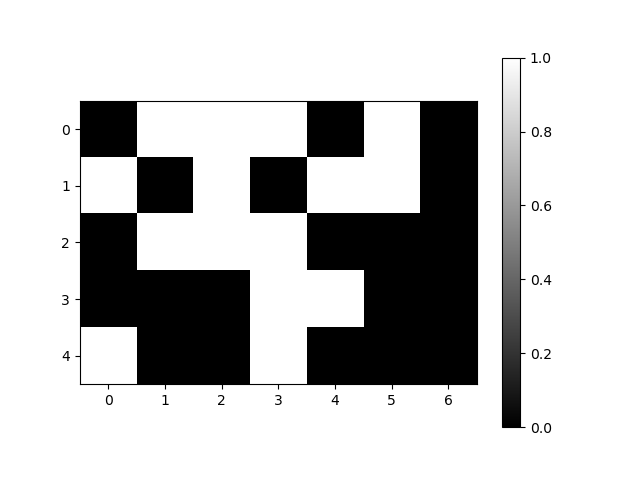

In [3]:
plt.figure()
plt.imshow(cells, cmap=cm.gray)
plt.colorbar()
plt.show()

Now, you need to find a way to calculate the number of living (1) neighbors around every cell. 

Tips:
* Try several methods and determine which one is the best for you,
* The use **numpy**'s [slicing and striding methods](https://numpy.org/doc/stable/user/basics.indexing.html) can help,
* Alternatively, numba can be an interesting solution in terms of performance, see [5 min to Numba](https://numba.pydata.org/numba-doc/dev/user/5minguide.html).
* Boundary conditions are importants.

Neighbors counts can be stored in a matrix like the following one:

In [4]:
neighbors = np.zeros_like(cells)
neighbors

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [5]:
nr, nc = cells.shape
nr, nc

(5, 7)

In [6]:
cells

array([[0, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0]])

In [7]:
from numba import njit


@njit  # NJIT DECORATOR: MAKES FUNCTIONS FASTER USING JUST-in-TIME COMPILATION
def calculate_neighbors(cells):
    neighbors = np.zeros_like(cells)
    nr, nc = cells.shape
    for r in range(nr):  # ROW LOOP
        for c in range(nc):  # COLUMNS LOOP
            neigh = -cells[r, c]  # NUMBER OF NEIGHBORS
            for ro in range(-1, 2):  # NEIGHBORS ON THE ROWS
                for co in range(-1, 2):  # NEIGHBORS ON THE COLUMBNS
                    rr = r + ro
                    cc = c + co
                    if (rr >= 0) and (rr < nr) and (cc >= 0) and (cc < nc):
                        neigh += cells[rr, cc]
            neighbors[r, c] = neigh
    return neighbors


neighbors = calculate_neighbors(cells)
neighbors

array([[2, 3, 3, 3, 4, 2, 2],
       [2, 6, 6, 6, 4, 2, 2],
       [2, 3, 4, 5, 5, 3, 1],
       [2, 3, 5, 4, 3, 1, 0],
       [0, 1, 2, 2, 3, 1, 0]])

In [11]:
big_cells = np.random.randint(2, size=(200, 200))
#%timeit big_neighbors = calculate_neighbors(big_cells)
big_neighbors = calculate_neighbors(big_cells)
big_neighbors

array([[1, 3, 4, ..., 2, 2, 1],
       [2, 2, 3, ..., 3, 4, 3],
       [3, 4, 4, ..., 6, 6, 3],
       ...,
       [3, 7, 5, ..., 5, 4, 3],
       [3, 4, 2, ..., 4, 4, 3],
       [1, 3, 2, ..., 1, 1, 1]])

## Apply the rule
 GoL rule:
 * SURVIVAL: a cell is alive and has 2 or 3 living neighbors: stay alive, die otherwise
 * BIRTH: a cell is dead and has 3 living neighbors: birth, stay dead otherwise

In [12]:
cells

array([[0, 1, 1, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 0, 0]])

In [13]:
S = [2, 3]  # SURVIVAL
B = [3]  # BIRTH
neighbors = calculate_neighbors(cells)
neighbors

array([[2, 3, 3, 3, 4, 2, 2],
       [2, 6, 6, 6, 4, 2, 2],
       [2, 3, 4, 5, 5, 3, 1],
       [2, 3, 5, 4, 3, 1, 0],
       [0, 1, 2, 2, 3, 1, 0]])

In [18]:
def apply_rule(cells, S, B):
    neighbors = calculate_neighbors(cells)
    new_cells = (
        (cells == 1) & np.isin(neighbors, S)  # SURVIVAL
        | (cells == 0) & np.isin(neighbors, B)
    ) * 1  # BIRTH
    return new_cells


cells = apply_rule(cells, S, B)
cells

array([[0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0]])

## Part 2: Creating a class 

In what follows, we propose to model the game of life by a class of which the method of calculation of the neighbors that you have just written would be a method. 
Here is a basic code snippet that you can use as inspiration to move forward.

In [37]:
class GoL:
    """
    A game of life class.
    """

    def __init__(self, cells, B = [3], S = [2,3]):
        self.cells = np.array(cells)
        self.B = np.array(B)
        self.S = np.array(S)

    def __repr__(self):
        return "<GoL with {0} cells>".format(self.cells.size)

    def count_living_neighbors(self):
        """
        Counts the number of living neighbors of each cell.
        """
        cells = self.cells
        neighbors = calculate_neighbors(cells)
        return neighbors

    def play(self):
        """
        make an evolution step forward.
        """
        cells = self.cells
        B = self.B
        S = self.S
        new_cells = apply_rule(cells, S, B)
        self.cells = new_cells


g = GoL(cells)
g.cells

array([[0, 1, 1, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 0]])

In [40]:
g.play()
g.cells

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 0]])

## Part 3: Animate your Game of Life !

In the following example, we provide you with a class which is not related to the game of life but which consists of similar methods. It shows how to make an animation. Use it as an inspiration to animate your game of life.

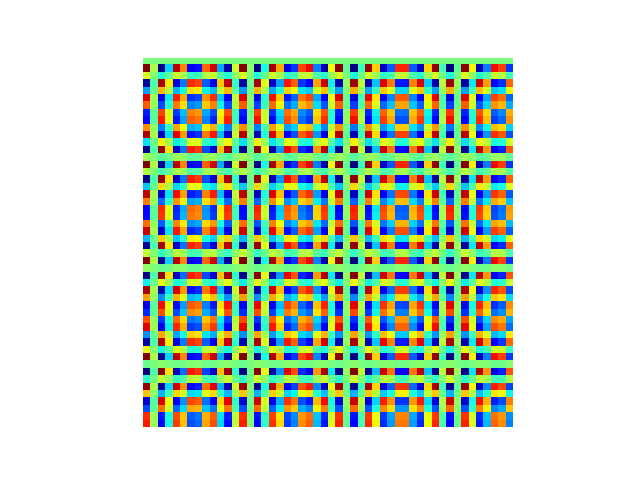

In [51]:
cells = np.random.randint(2, size=(100,100))
S = [1]
B = [1,2,3]
g = GoL(cells, S=S, B=B)


def updatefig(*args):
    g.play()
    im.set_array(g.cells)
    return (im,)


fig, ax = plt.subplots()
ax.axis("off")
im = plt.imshow(ri.image, interpolation="nearest", cmap=cm.jet, animated=True)
anim = animation.FuncAnimation(fig, updatefig, frames=40, interval=50, blit=True)
plt.show()
#plt.close()
#anim

### Part 4: Other rules

The game of life can be generalized and [other rules](https://en.wikipedia.org/wiki/Life-like_cellular_automaton) give surprising and interesting results from a mathematical point of view. Some of them include simple structures capable of cloning themselves, which reminds us of DNA in chemistry. 

Modify your work in order to be able to simulate other rules easily.

In [17]:
def f(x):
    y = x**2
    return y


y = f(5)
y

25

In [ ]:
type(y)

In [ ]:
y == None

In [19]:
s = """ fff
ffff
"""
s

' fff\nffff\n'

In [30]:
class Vec:
    """
    A vector class.
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def norm(self):
        """
        Returns the norm of the vector.
        """
        x = self.x
        y = self.y
        return np.sqrt(x**2 + y**2)

v = Vec(2,3)
v

In [31]:
v.x

2

In [34]:
v.norm()

3.605551275463989

In [29]:
u = Vec(33, 44)
u.x

33